In [1]:
import os
import cv2
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"
from fer import Video
from fer import FER
import sys
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

print("HelloWorld")

HelloWorld


In [2]:
# Put in the location of the video file that has to be processed
filepath = "Input/Videos/"
videofile = filepath + "Video_One.mp4"

def video_classificator(video_path):
    # But the Face detection detector
    face_detector = FER(mtcnn=True)
    # Input the video for processing
    input_video = Video(location_videofile)

    # The Analyze() function will run analysis on every frame of the input video. 
    # It will create a rectangular box around every image and show the emotion values next to that.
    # Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
    processing_data = input_video.analyze(face_detector, display=False)

video_classificator(videofile)

2023-10-05 10:40:28.101969: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-05 10:40:28.101988: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-05 10:40:28.101993: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-05 10:40:28.102019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-05 10:40:28.102032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


NameError: name 'location_videofile' is not defined

[{'box': [132, 45, 217, 296], 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.01, 'sad': 0.01, 'surprise': 0.0, 'neutral': 0.97}}]


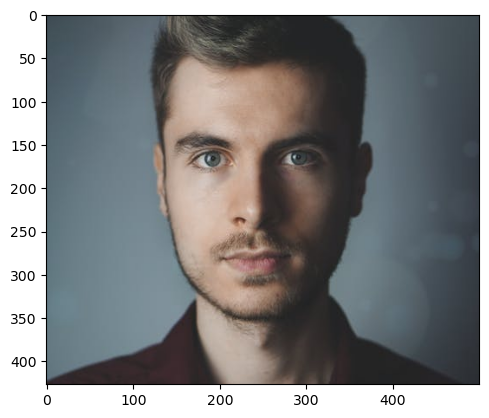

In [3]:
filepath = "Input/Images/"


test_image_one = plt.imread(filepath + "Image-one.jpeg")
emo_detector = FER(mtcnn=True)
# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)
# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(test_image_one)

In [2]:
# Initialize the FER detector
emo_detector = FER(mtcnn=True)

# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 is usually the default camera (webcam)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()

        # Add text to the frame
        text = "Press 'q' to quit"
        cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Call the FER top_emotion function on the current frame
        # dominant_emotion, emotion_score = emo_detector.top_emotion(frame)

        # Detect faces in the frame
        faces = emo_detector.detect_emotions(frame)

        for face in faces:
            x, y, w, h = face['box']  # Get the face bounding box coordinates
            dominant_emotion, emotion_score = sorted(face['emotions'].items(),key=lambda t: t[1], reverse=True)[0]

            # Draw a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red color

            # Display the dominant emotion and its score near the face
            emotion_text = f"{dominant_emotion} (Score: {emotion_score:.2f})"
            cv2.putText(frame, emotion_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Display the frame
        cv2.imshow("Webcam", frame)

        # Break the loop when the 'q' key is pressed
        key=cv2.waitKey(1)
        if key & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


2023-10-05 10:46:46.445705: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-05 10:46:46.445724: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-05 10:46:46.445729: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-05 10:46:46.445859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-05 10:46:46.446130: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


-1

: 

In [ ]:
# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 is usually the default camera (webcam)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()

        # Add text to the frame
        text = "Press 'q' to quit"
        cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Display the frame
        cv2.imshow("Webcam", frame)

        # Break the loop when the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()